## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

##  Importing Dataset

In [2]:
wine = pd.read_csv('wine.csv')
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Insights of data 

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

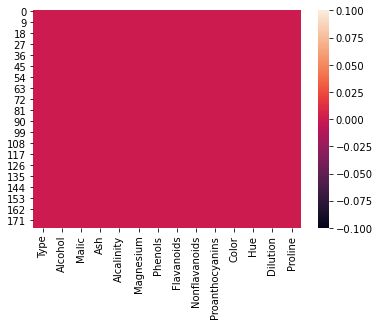

In [6]:
sns.heatmap(wine.isnull())
plt.show()

* There is no null values in this dataset.

## EDA

* Removing unnecessary column 'Type' from the dataset.

In [7]:
wine.drop(wine.columns[0],axis=1, inplace=True)
wine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


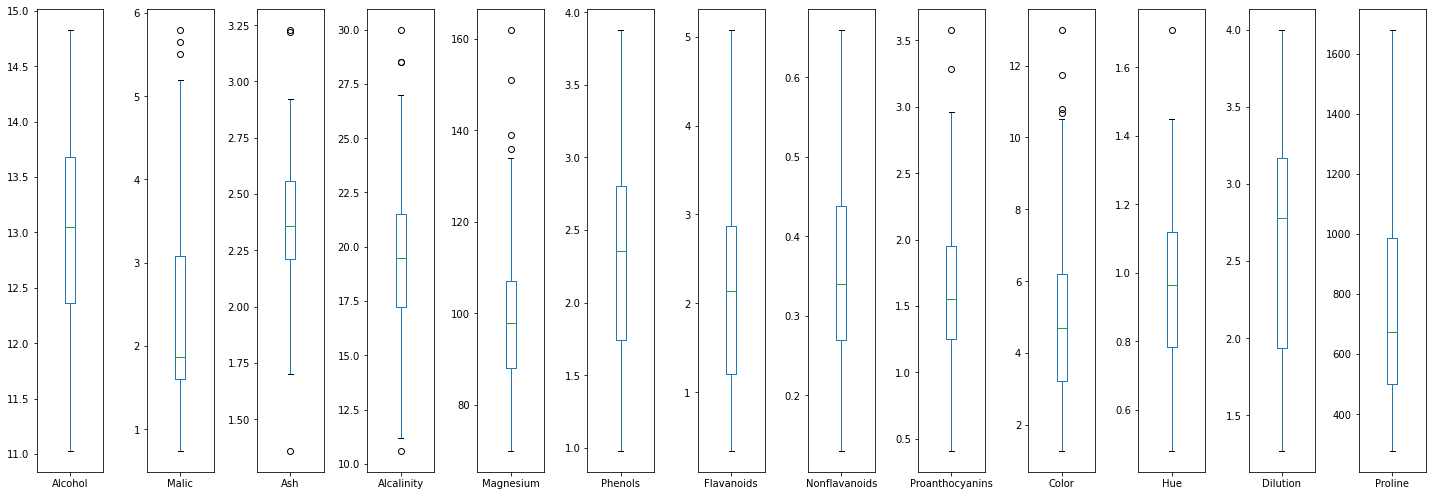

In [8]:
wine.plot(kind='box', subplots=True, figsize=(20,7))
plt.tight_layout()

##### More number of outliers observed in the dataset. Eliminate the outliers for better accuracy or prediction of model.

In [9]:
wine.drop(wine.index[wine['Malic']>5], inplace=True)
wine.drop(wine.index[wine['Ash']>3], inplace=True)
wine.drop(wine.index[wine['Ash']<1.8], inplace=True)
wine.drop(wine.index[wine['Alcalinity']>25], inplace=True)
wine.drop(wine.index[wine['Alcalinity']<11], inplace=True)
wine.drop(wine.index[wine['Magnesium']>132], inplace=True)
wine.drop(wine.index[wine['Proanthocyanins']>3], inplace=True)
wine.drop(wine.index[wine['Color']>10.5], inplace=True)
wine.drop(wine.index[wine['Hue']>1.6], inplace=True)

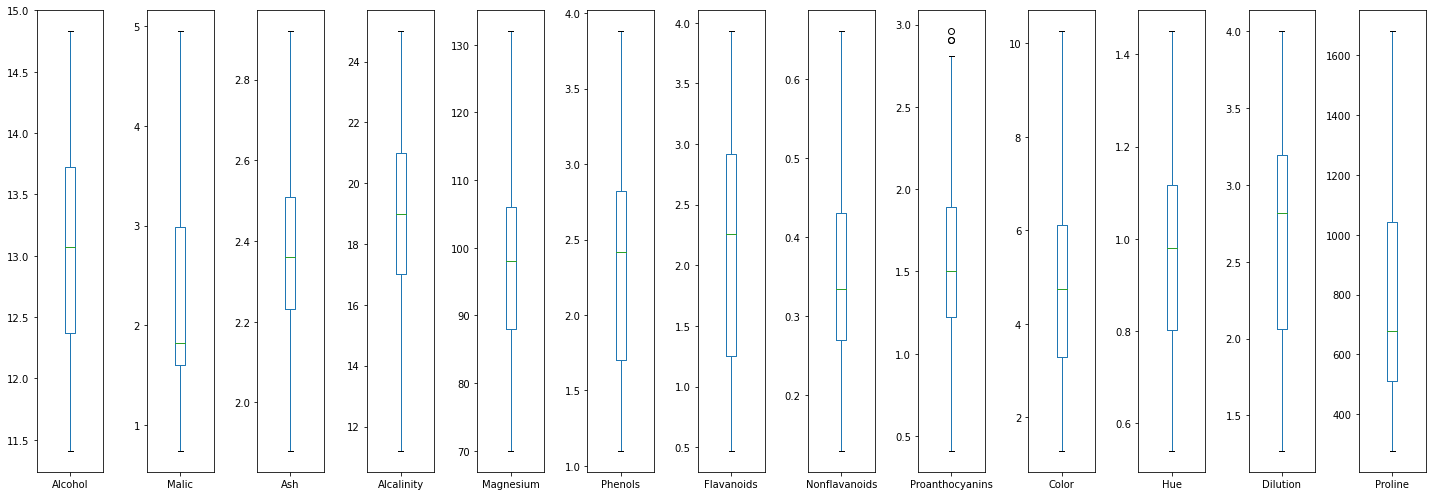

In [10]:
wine.plot(kind='box', subplots=True, figsize=(20,7))
plt.tight_layout()

* No outliers found in the dataset

### Standardizing Dataset 

In [11]:
scale = MinMaxScaler()
wine_std = scale.fit_transform(wine)
wine_std = pd.DataFrame(wine_std, columns=wine.columns)
wine_std.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.824561,0.230404,0.528846,0.318841,0.919355,0.611511,0.748555,0.283019,0.737255,0.485523,0.549451,0.970696,0.561341
1,0.523392,0.247031,0.250000,0.000000,0.483871,0.557554,0.661850,0.245283,0.341176,0.345212,0.560440,0.780220,0.550642
2,0.511696,0.384798,0.759615,0.536232,0.500000,0.611511,0.800578,0.320755,0.941176,0.489978,0.538462,0.695971,0.646933
3,0.865497,0.287411,0.596154,0.405797,0.693548,0.989209,0.872832,0.207547,0.694118,0.726058,0.351648,0.798535,0.857347
4,0.535088,0.439430,0.951923,0.710145,0.774194,0.611511,0.641618,0.490566,0.552941,0.338530,0.549451,0.608059,0.325963


In [12]:
wine_std.shape

(150, 13)

## Applying PCA to reduce dimensions

In [13]:
pca = PCA(random_state=40)
pca_values = pca.fit_transform(wine_std)

In [14]:
var = pca.explained_variance_ratio_
var

array([0.42373451, 0.20143299, 0.07639431, 0.07294556, 0.0459064 ,
       0.04035753, 0.03192086, 0.02619894, 0.02349618, 0.02060073,
       0.0156154 , 0.01384405, 0.00755253])

* First 3 principal components have more contribution i.e about 77.5%. So we are considering first 3 components for the building model. 

In [15]:
pca_values[:,:3]

array([[ 0.7905377 , -0.27753497, -0.00706482],
       [ 0.50638651,  0.08290956, -0.42419171],
       [ 0.60192055, -0.17652653,  0.28639811],
       [ 0.91206754, -0.57646827,  0.00737605],
       [ 0.2391209 , -0.16320212,  0.53664392],
       [ 0.73895858, -0.45135897, -0.13963296],
       [ 0.58262507, -0.23294214, -0.13680135],
       [ 0.49061608, -0.34277237,  0.10545525],
       [ 0.59608957, -0.186202  , -0.37210999],
       [ 0.66896203, -0.14245882, -0.2190603 ],
       [ 0.82155117, -0.24513503, -0.07119342],
       [ 0.40120276, -0.1213991 , -0.2557804 ],
       [ 0.49897035, -0.12640167, -0.1661767 ],
       [ 0.84988402, -0.20706898, -0.24430293],
       [ 1.03562504, -0.4356733 , -0.26443672],
       [ 0.5605347 , -0.36654233,  0.06370766],
       [ 0.53275119, -0.49611476,  0.21299529],
       [ 0.47999433, -0.33349746,  0.14246579],
       [ 0.88851969, -0.53936532, -0.14268565],
       [ 0.49988849, -0.2482707 ,  0.12667263],
       [ 0.7388135 , -0.13616995, -0.078

### Creating dataset using PCA (first 3 components)

In [16]:
wine_pca = pd.DataFrame(pca_values[:,:3], columns=['PC1', 'PC2', 'PC3'])
wine_pca.head(10)

,PC1,PC2,PC3
0,0.790538,-0.277535,-0.007065
1,0.506387,0.082910,-0.424192
2,0.601921,-0.176527,0.286398
3,0.912068,-0.576468,0.007376
4,0.239121,-0.163202,0.536644
5,0.738959,-0.451359,-0.139633
6,0.582625,-0.232942,-0.136801
7,0.490616,-0.342772,0.105455
8,0.596090,-0.186202,-0.372110
9,0.668962,-0.142459,-0.219060


# Building Model 

## Hierarchical Clustering with PCA

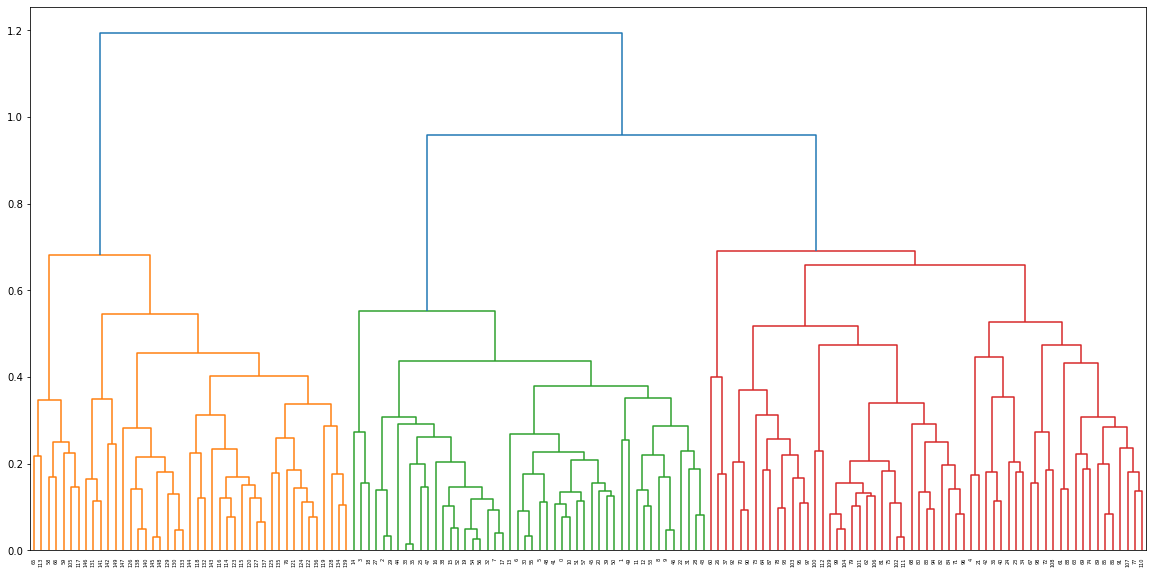

In [17]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(wine_pca, method='average'))

##### From above dendrogram, we can see that '3' number of clusters are formed.

In [18]:
hc = AgglomerativeClustering(n_clusters=3)

In [19]:
wine_hc=hc.fit(wine_pca)
wine_hc.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

#### Calculating 'Silhouette' Score 

In [20]:
import sklearn
round(sklearn.metrics.silhouette_score(wine_pca, wine_hc.labels_),4)

0.4855

#### Adding Cluster column in the data

In [21]:
wine_pca['ClusterID_HC']=wine_hc.labels_
wine_pca.head()

,PC1,PC2,PC3,ClusterID_HC
0,0.790538,-0.277535,-0.007065,1
1,0.506387,0.082910,-0.424192,1
2,0.601921,-0.176527,0.286398,1
3,0.912068,-0.576468,0.007376,1
4,0.239121,-0.163202,0.536644,1


#### Grouping clusters

In [22]:
wine_pca.groupby('ClusterID_HC').mean()

,PC1,PC2,PC3
ClusterID_HC,,,
0,-0.107120,0.412517,0.009055
1,0.548402,-0.188403,-0.011935
2,-0.716906,-0.338156,0.005144


In [23]:
wine_pca['ClusterID_HC'].value_counts()

1    58
0    56
2    36
Name: ClusterID_HC, dtype: int64

## Hierarchical Clustering without PCA 

In [24]:
wine_std.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.824561,0.230404,0.528846,0.318841,0.919355,0.611511,0.748555,0.283019,0.737255,0.485523,0.549451,0.970696,0.561341
1,0.523392,0.247031,0.250000,0.000000,0.483871,0.557554,0.661850,0.245283,0.341176,0.345212,0.560440,0.780220,0.550642
2,0.511696,0.384798,0.759615,0.536232,0.500000,0.611511,0.800578,0.320755,0.941176,0.489978,0.538462,0.695971,0.646933
3,0.865497,0.287411,0.596154,0.405797,0.693548,0.989209,0.872832,0.207547,0.694118,0.726058,0.351648,0.798535,0.857347
4,0.535088,0.439430,0.951923,0.710145,0.774194,0.611511,0.641618,0.490566,0.552941,0.338530,0.549451,0.608059,0.325963


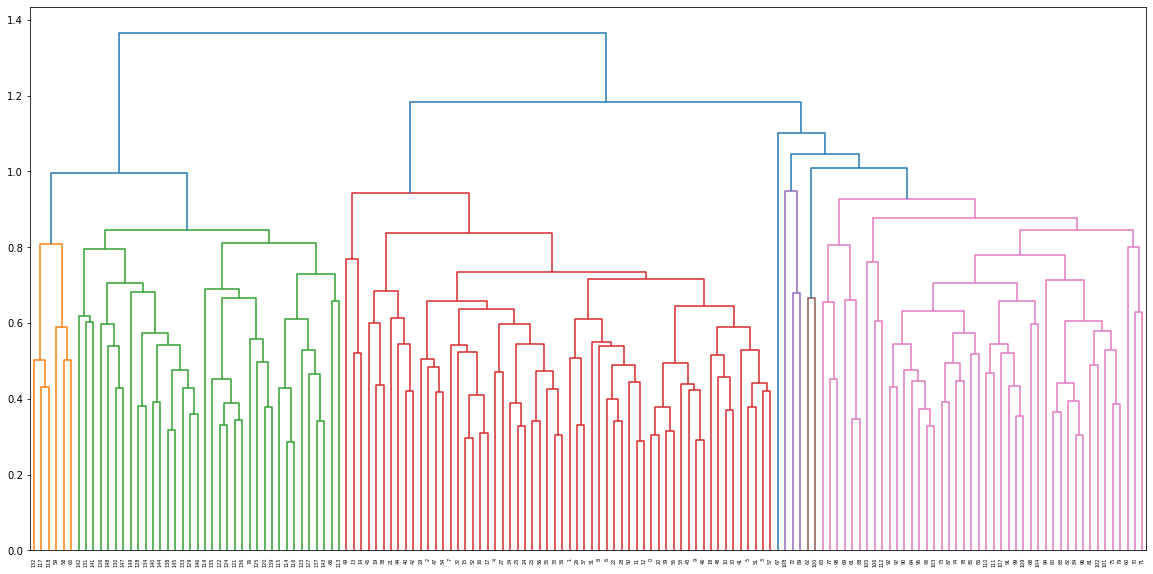

In [25]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(wine_std, method='average'))

##### From above dendrogram, we are selecting number of clusters as '7'.

In [26]:
hc=AgglomerativeClustering(n_clusters=7)

In [27]:
wine_hc1=hc.fit(wine_std)
wine_hc1.labels_

array([2, 2, 2, 2, 5, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 2, 6, 2, 6,
       2, 5, 5, 5, 2, 5, 2, 2, 2, 5, 5, 5, 5, 5, 5, 2, 6, 2, 6, 5, 6, 2,
       6, 6, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 5, 2, 0, 0, 1, 1, 4, 5, 1, 0,
       0, 5, 1, 1, 4, 4, 1, 1, 1, 4, 0, 1, 1, 4, 4, 1, 4, 4, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 4, 4, 1, 1, 1, 0, 4, 1, 1, 1,
       1, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 0, 0, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3], dtype=int64)

#### Calculating 'Silhoutte' Score

In [28]:
round(sklearn.metrics.silhouette_score(wine_std, wine_hc1.labels_),4)

0.1383

#### Adding cluster column

In [29]:
wine_std['ClusterID']=wine_hc1.labels_
wine_std.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterID
0,0.824561,0.230404,0.528846,0.318841,0.919355,0.611511,0.748555,0.283019,0.737255,0.485523,0.549451,0.970696,0.561341,2
1,0.523392,0.247031,0.250000,0.000000,0.483871,0.557554,0.661850,0.245283,0.341176,0.345212,0.560440,0.780220,0.550642,2
2,0.511696,0.384798,0.759615,0.536232,0.500000,0.611511,0.800578,0.320755,0.941176,0.489978,0.538462,0.695971,0.646933,2
3,0.865497,0.287411,0.596154,0.405797,0.693548,0.989209,0.872832,0.207547,0.694118,0.726058,0.351648,0.798535,0.857347,2
4,0.535088,0.439430,0.951923,0.710145,0.774194,0.611511,0.641618,0.490566,0.552941,0.338530,0.549451,0.608059,0.325963,5


#### Grouping Clusters

In [30]:
wine_std.groupby('ClusterID').mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
ClusterID,,,,,,,,,,,,,
0,0.441970,0.492874,0.443047,0.638239,0.451613,0.191616,0.102935,0.634978,0.196983,0.414554,0.292730,0.185827,0.242483
1,0.255757,0.248144,0.309195,0.644022,0.310484,0.495504,0.532876,0.338443,0.494240,0.185064,0.533997,0.656136,0.143032
2,0.717349,0.235226,0.444056,0.361660,0.556696,0.651951,0.761867,0.264151,0.655971,0.524836,0.576757,0.693862,0.646328
3,0.545752,0.659634,0.542986,0.746377,0.496205,0.206094,0.104386,0.541620,0.308420,0.850124,0.088559,0.141564,0.262188
4,0.185575,0.320507,0.455769,0.681643,0.316129,0.246283,0.342775,0.645283,0.390588,0.174165,0.590476,0.456654,0.158393
5,0.619883,0.250119,0.728846,0.531884,0.591129,0.591727,0.683237,0.370755,0.487451,0.410468,0.638462,0.651465,0.542546
6,0.675021,0.718018,0.506868,0.412008,0.603687,0.596095,0.673823,0.234501,0.528291,0.390073,0.430141,0.747776,0.437029


### Observation:
* Silhouette score (Hierarchical Clustering) :
    
    1. With PCA    :- 0.4855
    
    2. Without PCA :- 0.1383
    
* From this, we can say that Hierarchical clustering model done with the help of PCA is better than without PCA.

## Kmeans with PCA

In [31]:
wine_pca.drop(wine_pca.columns[-1], axis=1, inplace=True)
wine_pca.head()

,PC1,PC2,PC3
0,0.790538,-0.277535,-0.007065
1,0.506387,0.082910,-0.424192
2,0.601921,-0.176527,0.286398
3,0.912068,-0.576468,0.007376
4,0.239121,-0.163202,0.536644


#### 'Elbow' curve

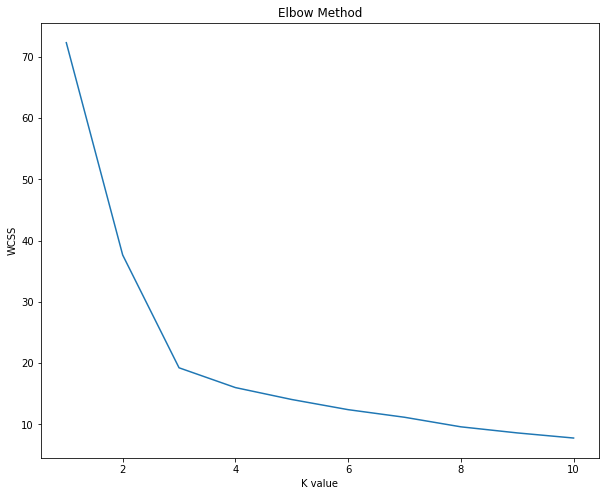

In [32]:
plt.figure(figsize=[10,8])

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(wine_pca)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

* From above elbow method curve, we will select K value as '3'.

In [33]:
wine_kmeans=KMeans(n_clusters=3).fit(wine_pca)
wine_kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Calculating 'Silhouette' score

In [34]:
import sklearn
round(sklearn.metrics.silhouette_score(wine_pca, wine_kmeans.labels_),4)

0.4956

#### Adding cluster column

In [35]:
wine_pca['ClusterID_kmeans']=wine_kmeans.labels_

In [36]:
wine_pca.head()

,PC1,PC2,PC3,ClusterID_kmeans
0,0.790538,-0.277535,-0.007065,1
1,0.506387,0.082910,-0.424192,1
2,0.601921,-0.176527,0.286398,1
3,0.912068,-0.576468,0.007376,1
4,0.239121,-0.163202,0.536644,1


#### Grouping cluster

In [37]:
wine_pca.groupby('ClusterID_kmeans').mean()

,PC1,PC2,PC3
ClusterID_kmeans,,,
0,-0.084917,0.439228,0.041745
1,0.548017,-0.178461,-0.013974
2,-0.700056,-0.296786,-0.032613


## Kmeans without PCA 

In [38]:
wine_std.drop(wine_std.columns[-1], axis=1, inplace=True)
wine_std.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.824561,0.230404,0.528846,0.318841,0.919355,0.611511,0.748555,0.283019,0.737255,0.485523,0.549451,0.970696,0.561341
1,0.523392,0.247031,0.250000,0.000000,0.483871,0.557554,0.661850,0.245283,0.341176,0.345212,0.560440,0.780220,0.550642
2,0.511696,0.384798,0.759615,0.536232,0.500000,0.611511,0.800578,0.320755,0.941176,0.489978,0.538462,0.695971,0.646933
3,0.865497,0.287411,0.596154,0.405797,0.693548,0.989209,0.872832,0.207547,0.694118,0.726058,0.351648,0.798535,0.857347
4,0.535088,0.439430,0.951923,0.710145,0.774194,0.611511,0.641618,0.490566,0.552941,0.338530,0.549451,0.608059,0.325963


#### 'Elbow' Curve

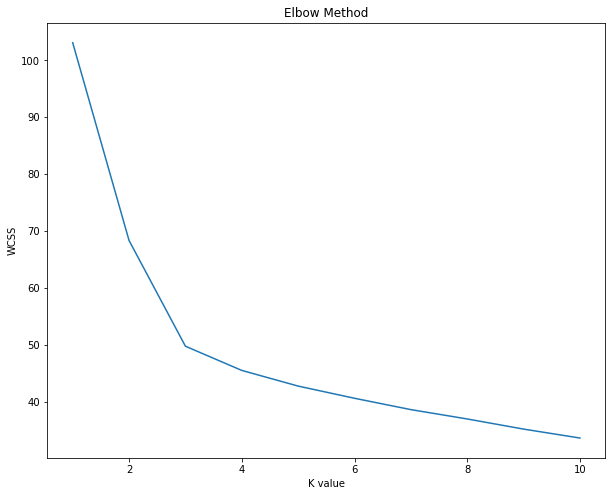

In [39]:
plt.figure(figsize=[10,8])

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(wine_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

* From above elbow method curve, we will select K value '3'

In [40]:
wine_kmeans1=KMeans(n_clusters=3).fit(wine_std)
wine_kmeans1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Calculating 'Silhouette' score

In [41]:
round(sklearn.metrics.silhouette_score(wine_std, wine_kmeans1.labels_),4)

0.3159

#### Adding cluster column in the data

In [42]:
wine_std['ClusterID']=wine_kmeans1.labels_
wine_std.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterID
0,0.824561,0.230404,0.528846,0.318841,0.919355,0.611511,0.748555,0.283019,0.737255,0.485523,0.549451,0.970696,0.561341,1
1,0.523392,0.247031,0.250000,0.000000,0.483871,0.557554,0.661850,0.245283,0.341176,0.345212,0.560440,0.780220,0.550642,1
2,0.511696,0.384798,0.759615,0.536232,0.500000,0.611511,0.800578,0.320755,0.941176,0.489978,0.538462,0.695971,0.646933,1
3,0.865497,0.287411,0.596154,0.405797,0.693548,0.989209,0.872832,0.207547,0.694118,0.726058,0.351648,0.798535,0.857347,1
4,0.535088,0.439430,0.951923,0.710145,0.774194,0.611511,0.641618,0.490566,0.552941,0.338530,0.549451,0.608059,0.325963,1


#### Grouping Clusters

In [43]:
wine_std.groupby('ClusterID').mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
ClusterID,,,,,,,,,,,,,
0,0.251068,0.257354,0.371302,0.649387,0.328164,0.414361,0.463317,0.448113,0.448416,0.187832,0.562891,0.567413,0.161116
1,0.686177,0.301663,0.540782,0.413043,0.581201,0.627264,0.727626,0.296031,0.583908,0.476826,0.572376,0.691234,0.601026
2,0.491959,0.592221,0.489663,0.696196,0.462500,0.190737,0.096821,0.588208,0.248725,0.615033,0.185165,0.166209,0.242903


### Observation :
* Silhouette score (KMeans Clustering) :
    
    1. With PCA    :- 0.4956
    
    2. Without PCA :- 0.3159
    
* From this, we can say that KMeans clustering model done with the help of PCA is better than without PCA.

## Conclusion :

* From this we can conclude that dimension reduction technique with the help of PCA is more useful for performing machine learnings to achieve better predictions in the production.